In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D  
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend

In [2]:


X_train = pd.read_csv('Data/X_train.csv')

X_test = pd.read_csv('Data/X_test.csv')

y_train = pd.read_csv('Data/y_train.csv')

y_test = pd.read_csv('Data/y_test.csv')


In [3]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (52560, 527)
Shape of y_train: (52560, 2)


In [4]:
y_train = y_train['target']
y_test = y_test['target']

In [5]:
X_train["state"].values.reshape(-1,1)

array([['new mexico'],
       ['new mexico'],
       ['new mexico'],
       ...,
       ['wyoming'],
       ['wyoming'],
       ['wyoming']], dtype=object)

In [6]:

encoder = OneHotEncoder()

encoder.fit(X_train['state'].values.reshape(-1, 1))

X_train_encoded = encoder.transform(X_train['state'].values.reshape(-1, 1))
X_test_encoded = encoder.transform(X_test['state'].values.reshape(-1, 1))

X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

print(encoder.categories_[0])

['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'louisiana' 'maine'
 'maryland' 'massachusetts' 'michigan' 'minnesota' 'mississippi'
 'missouri' 'nebraska' 'nevada' 'new hampshire' 'new jersey' 'new mexico'
 'new york' 'north carolina' 'north dakota' 'ohio' 'oklahoma' 'oregon'
 'pennsylvania' 'rhode island' 'south carolina' 'tennessee' 'texas' 'utah'
 'vermont' 'virginia' 'washington' 'west virginia' 'wisconsin' 'wyoming']


In [7]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.categories_[0])

X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.categories_[0])


In [8]:
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)
X_train.drop('state', axis=1, inplace=True)
X_test.drop('state', axis=1, inplace=True)

In [9]:
X_train

,weeks,flu,swine,stomach,symptoms,virus,bug,strep,season,influenza,...,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1090,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52556,1091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52557,1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52558,1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [11]:
concatenated_df = pd.concat([X_train, X_test])

# Check for missing values in each column
missing_values = concatenated_df.isna().sum()

# Iterate over the missing_values Series
for column_name, num_missing in missing_values.items():
    if num_missing > 0:
        print(f"Column '{column_name}' has {num_missing} missing values.")
    else :
        print("-")

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


In [12]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [13]:
X_train

,weeks,flu,swine,stomach,symptoms,virus,bug,strep,season,influenza,...,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1090,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52556,1091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52557,1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52558,1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

In [15]:
X.iloc[1000, : ]

y_train

0        0
1        0
2        0
3        0
4        0
        ..
52555    0
52556    0
52557    0
52558    0
52559    0
Name: target, Length: 52560, dtype: int64

In [ ]:
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [ ]:
X_train = X_res
y_train = y_res

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


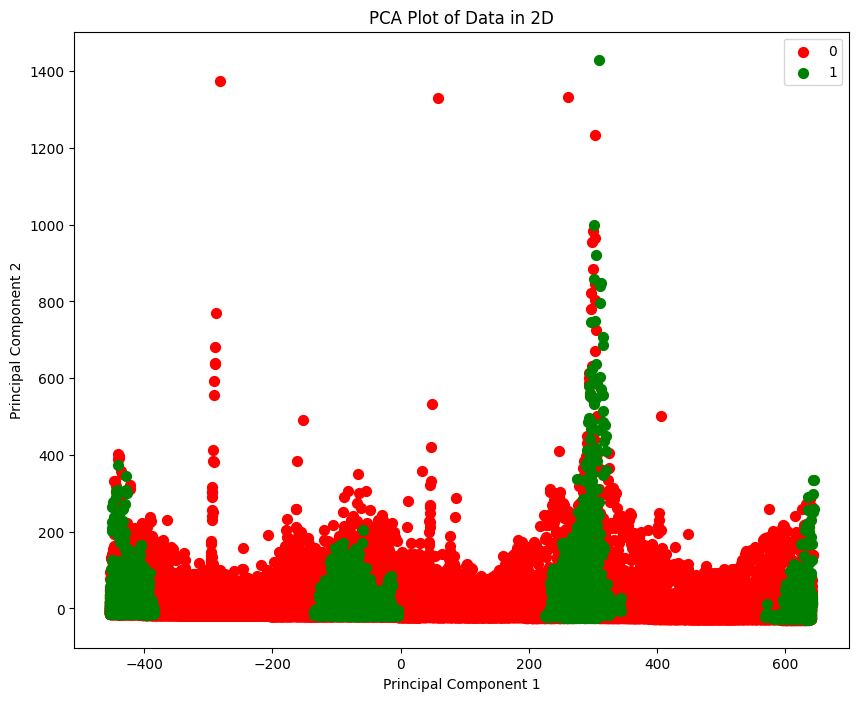

In [16]:


# Concatenate X_train and X_test along axis 0
X = pd.concat([X_train, X_test], axis=0)

# Concatenate y_train and y_test along axis 0
y = pd.concat([y_train, y_test], axis=0)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y.values

# Plot the data in 2D
plt.figure(figsize=(10, 8))
targets = df_pca['Target'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'gray'][:len(targets)]
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'], df_pca.loc[indices_to_keep, 'PC2'], c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Data in 2D')
plt.legend()
plt.show()


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


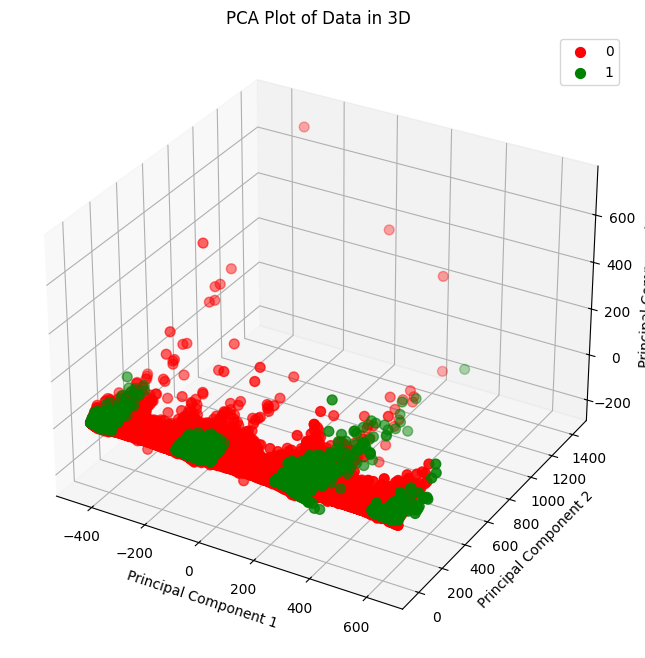

In [17]:


# Concatenate X_train and X_test along axis 0
X = pd.concat([X_train, X_test], axis=0)

# Concatenate y_train and y_test along axis 0
y = pd.concat([y_train, y_test], axis=0)

# Apply PCA to reduce dimensionality to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Target'] = y.values

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = df_pca['Target'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'gray'][:len(targets)]
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    ax.scatter(df_pca.loc[indices_to_keep, 'PC1'], 
               df_pca.loc[indices_to_keep, 'PC2'], 
               df_pca.loc[indices_to_keep, 'PC3'], 
               c=color, 
               s=50, 
               label=target)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Plot of Data in 3D')
ax.legend()
plt.show()


<h1>Grid Search</h1>

<h2>RF</h2>

In [22]:


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,)

# Fit the data to perform grid search with parallelization
with parallel_backend('loky'):
    grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Evaluate the model
accuracy = best_rf.score(X_test, y_test)

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")
print(f"Test Accuracy: {accuracy}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9292037045035132
Test Accuracy: 0.9024914089347079


<h2>nb</h2>

In [25]:


# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Fit the data to perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_gnb = GaussianNB(**best_params)
best_gnb.fit(X_train, y_train)

# Evaluate the model
accuracy = best_gnb.score(X_test, y_test)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")
print(f"Test Set Accuracy: {accuracy}")


Best Parameters: {'var_smoothing': 1e-07}
Best Cross-Validation Score: 0.5795336649520532
Test Set Accuracy: 0.8661941580756014


<h1> Random Forest Classifier  </h1>

In [44]:


rf = RandomForestClassifier(min_samples_leaf=4, min_samples_split=2, n_estimators=200)

rf.fit(X_train, y_train)

train_predictions_rf = rf.predict(X_train)
test_predictions_rf = rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 0.9871104930060064
Test Accuracy: 0.9024914089347079
Confusion Matrix:
 [[20949    49]
 [ 2221    61]]
Precision: 0.8698742914149212
Recall: 0.9024914089347079
F1 Score: 0.8606187392192547
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     20998
           1       0.55      0.03      0.05      2282

    accuracy                           0.90     23280
   macro avg       0.73      0.51      0.50     23280
weighted avg       0.87      0.90      0.86     23280



<h1>Naive Bayes</h1>

In [45]:
nb = GaussianNB(var_smoothing=1e-07)

nb.fit(X_train, y_train)

train_predictions_nb = nb.predict(X_train)
test_predictions_nb = nb.predict(X_test)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.609968960374088
Test Accuracy: 0.8631872852233677
Confusion Matrix:
 [[19303  1695]
 [ 1490   792]]
Precision: 0.8685578387464596
Recall: 0.8631872852233677
F1 Score: 0.8657922395722166
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     20998
           1       0.32      0.35      0.33      2282

    accuracy                           0.86     23280
   macro avg       0.62      0.63      0.63     23280
weighted avg       0.87      0.86      0.87     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


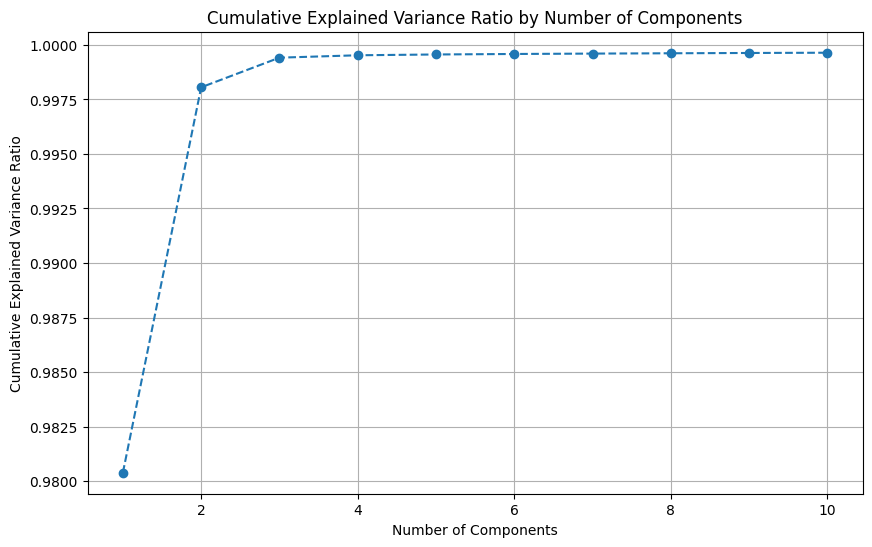

In [18]:


pca = PCA(n_components=10)

pca.fit(X_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


<h1>PCA (n_components = 3)</h1> 

In [47]:

pca = PCA(n_components=3)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


<h2>RF </h2>

In [48]:

rf = RandomForestClassifier(min_samples_leaf=4, min_samples_split=2, n_estimators=200)

rf.fit(X_train_pca, y_train)

train_predictions_rf = rf.predict(X_train_pca)
test_predictions_rf = rf.predict(X_test_pca)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 0.9686580400693353
Test Accuracy: 0.828651202749141
Confusion Matrix:
 [[18878  2120]
 [ 1869   413]]
Precision: 0.8367037627221372
Recall: 0.828651202749141
F1 Score: 0.8326021691546066
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     20998
           1       0.16      0.18      0.17      2282

    accuracy                           0.83     23280
   macro avg       0.54      0.54      0.54     23280
weighted avg       0.84      0.83      0.83     23280



<h1> Gaussian NB </h1>

In [49]:
nb = GaussianNB(var_smoothing=1e-07)

nb.fit(X_train_pca, y_train)

train_predictions_nb = nb.predict(X_train_pca)
test_predictions_nb = nb.predict(X_test_pca)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.5756842826621518
Test Accuracy: 0.8694158075601375
Confusion Matrix:
 [[19918  1080]
 [ 1960   322]]
Precision: 0.8436833529921659
Recall: 0.8694158075601375
F1 Score: 0.8551595075273042
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     20998
           1       0.23      0.14      0.17      2282

    accuracy                           0.87     23280
   macro avg       0.57      0.54      0.55     23280
weighted avg       0.84      0.87      0.86     23280



<h1>PCA (n_components = 2)</h1> 

In [50]:

pca = PCA(n_components=2)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [51]:
X_test_pca


array([[-549.48081643,  -17.9196909 ],
       [-548.52438256,  -19.48323894],
       [-547.52474651,  -19.51015375],
       ...,
       [ -67.69948473,  -32.42926154],
       [ -66.69984868,  -32.45617634],
       [ -65.70021262,  -32.48309115]])

<h2>RF</h2>

In [52]:

rf = RandomForestClassifier(min_samples_leaf=4, min_samples_split=2, n_estimators=200)

rf.fit(X_train_pca, y_train)

train_predictions_rf = rf.predict(X_train_pca)
test_predictions_rf = rf.predict(X_test_pca)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 0.9491272624662394
Test Accuracy: 0.8118127147766323
Confusion Matrix:
 [[18364  2634]
 [ 1747   535]]
Precision: 0.840171916276214
Recall: 0.8118127147766323
F1 Score: 0.8250936233664576
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     20998
           1       0.17      0.23      0.20      2282

    accuracy                           0.81     23280
   macro avg       0.54      0.55      0.54     23280
weighted avg       0.84      0.81      0.83     23280



<h2>G nb</h2>

In [53]:
nb = GaussianNB(var_smoothing=1e-07)

nb.fit(X_train_pca, y_train)

train_predictions_nb = nb.predict(X_train_pca)
test_predictions_nb = nb.predict(X_test_pca)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.5625730640545007
Test Accuracy: 0.8756443298969072
Confusion Matrix:
 [[20089   909]
 [ 1986   296]]
Precision: 0.84490769266246
Recall: 0.8756443298969072
F1 Score: 0.857994689893366
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     20998
           1       0.25      0.13      0.17      2282

    accuracy                           0.88     23280
   macro avg       0.58      0.54      0.55     23280
weighted avg       0.84      0.88      0.86     23280



<h1>PCA (n_components = 1)</h1> 

In [54]:

pca = PCA(n_components=1)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


<h2>RF<h2>

In [55]:

rf = RandomForestClassifier(min_samples_leaf=4, min_samples_split=2, n_estimators=200)

rf.fit(X_train_pca, y_train)

train_predictions_rf = rf.predict(X_train_pca)
test_predictions_rf = rf.predict(X_test_pca)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


Random Forest Model:
Train Accuracy: 0.9330430926754545
Test Accuracy: 0.7991838487972509
Confusion Matrix:
 [[18002  2996]
 [ 1679   603]]
Precision: 0.841451331890412
Recall: 0.7991838487972509
F1 Score: 0.8184186301825085
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89     20998
           1       0.17      0.26      0.21      2282

    accuracy                           0.80     23280
   macro avg       0.54      0.56      0.55     23280
weighted avg       0.84      0.80      0.82     23280



<h2>G nb<h2>

In [56]:
nb = GaussianNB(var_smoothing=1e-07)

nb.fit(X_train_pca, y_train)

train_predictions_nb = nb.predict(X_train_pca)
test_predictions_nb = nb.predict(X_test_pca)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.554742612972145
Test Accuracy: 0.5683419243986254
Confusion Matrix:
 [[12748  8250]
 [ 1799   483]]
Precision: 0.7958517453531677
Recall: 0.5683419243986253
F1 Score: 0.655573043598579
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72     20998
           1       0.06      0.21      0.09      2282

    accuracy                           0.57     23280
   macro avg       0.47      0.41      0.40     23280
weighted avg       0.80      0.57      0.66     23280



<nb>
<h1 style="color:green">  

 Artifical neural networks 
 
 
 
 
 </h1>

<h4>  importing necessary libraries for deep learning </h4>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


pd.DataFrame(X_train)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and

,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
0,-1.730470,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
1,-1.727306,0.338760,0.060041,-0.040054,-0.096427,-0.134679,-0.163507,-0.185185,-0.202898,-0.218368,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
2,-1.724143,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
3,-1.720979,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
4,-1.717815,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1.717815,-0.394992,-0.486127,-0.503254,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655
52556,1.720979,-0.394992,-0.486127,-0.503254,-0.510835,-0.516807,-0.520035,-0.524420,-0.526406,-0.528151,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655
52557,1.724143,-0.394992,-0.486127,-0.503254,-0.510835,-0.516807,-0.520035,-0.524420,-0.526406,-0.528151,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655
52558,1.727306,-0.394992,-0.486127,-0.503254,-0.510835,-0.516807,-0.520035,-0.524420,-0.526406,-0.528151,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655


<h3> oversampling data using ADASYIN </h3>

In [32]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

<h3>  finding best hyperparametres for training the artificial neural network used on original data  </h1>

In [35]:
best_params = {'batch_size': 10, 'epochs': 5, "layer1": 10, "layer2": 10,"activation" : "relu"}
best_accuracy  = 0
batch_size = [32,64,128]
layers1 = [64,256]
layers2 = [16,32,128]
activations = ["relu","tanh"]


for batch in batch_size:
    for layer1 in layers1:
        for layer2 in layers2:  
            for activation in activations : 
                model = Sequential()
                model.add(Dense(layer1, input_dim=X_train.shape[1], activation=activation))
                model.add(Dense(layer2, activation=activation))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=2, batch_size=batch, verbose=1)
                test_accuracy = model.evaluate(X_test, y_test)[1]
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = {'batch_size': batch, 'epochs': 2, "layer1": layer1,"layer2"  : layer2,"activation" :activation }
                    print("Best Parameters:", best_params)
                    print("Test Accuracy:", test_accuracy)
                print("Test Accuracy:", test_accuracy)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9162 - loss: 0.2267
Epoch 2/2
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9595 - loss: 0.1148
728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9083 - loss: 0.3043
Best Parameters: {'batch_size': 32, 'epochs': 2, 'layer1': 64, 'layer2': 16, 'activation': 'relu'}
Test Accuracy: 0.909235417842865
Test Accuracy: 0.909235417842865
Epoch 1/2
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8990 - loss: 0.2607
Epoch 2/2
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9598 - loss: 0.1132
728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.9076 - loss: 0.2944
Best Parameters: {'batch_size': 32, 'epochs': 2, 'layer1': 64, 'layer2': 16, 'activation': 'tanh'}
Test Accuracy: 0.9097937941551208
Test Accuracy: 0.9097937941551208
Epoch 1/2
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9327 - loss: 0.1936
Epoch 2/2
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9596 - loss:

In [38]:
print(f" best params = {best_params} with accuracy = {best_accuracy}")

 best params = {'batch_size': 64, 'epochs': 2, 'layer1': 64, 'layer2': 32, 'activation': 'tanh'} with accuracy = 0.9125000238418579


In [ ]:
best_params ={'batch_size': 64, 'epochs': 2, 'layer1': 64, 'layer2': 32, 'activation': 'tanh'}
print("Best Parameters:", best_params)
best_accuracy


Best Parameters: {'batch_size': 10, 'epochs': 5, 'layer1': 10, 'layer2': 10}


0

# training using the model with best parametres

In [39]:
model = Sequential()
model.add(Dense(best_params["layer1"], input_dim=X_train.shape[1], activation=best_params["activation"]))
model.add(Dense(best_params["layer2"], activation=best_params["activation"]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#perform  early stop

model.fit(X_train, y_train, epochs=100, batch_size=best_params["batch_size"], verbose=1)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8865 - loss: 0.2884
Epoch 2/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9600 - loss: 0.1179
Epoch 3/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.0906
Epoch 4/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9757 - loss: 0.0735
Epoch 5/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0582
Epoch 6/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9848 - loss: 0.0463
Epoch 7/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0360
Epoch 8/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0308
Epoch 9/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0281
Epoch 10/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9929 - loss: 0.0228
Epoch 11/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.0219
Epoch 12/100
822/822 ━━━━━━━━━━━━━━━━━━━━

<h1> choosing the best threshold for classification </h1>

In [170]:
from sklearn.metrics import precision_recall_fscore_support,precision_recall_curve,auc

thresholds = np.arange(0, 1, 0.1)
best_threshold = None
best_f1_score = 0
best_recall = 0

for threshold in thresholds:
    predicted = model.predict(X_test) >= threshold
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted)
    if f1_score[1] > best_f1_score:
        best_f1_score = f1_score[1]
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best F1 Score:", best_f1_score)


728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
100/728 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
120/728 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
 56/728 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
238/728 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
118/728 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
115/728 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step
226/728 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
239/728 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
105/728 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
Best Threshold: 0.1
Best F1 Score: 0.3614081996434938


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [203]:
best_threshold

predicted = model.predict(X_test)

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


In [204]:
best_threshold

0.7

<h3> using cost to choose better threshold by giving higher costs to FP </h3>

In [206]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Define costs
cost_fp = 10  # Cost of false positives
cost_fn = 50  # Cost of false negatives

# Initialize variables to store best threshold and minimum overall cost
best_threshold = None
min_overall_cost = float('inf')  # Initialize with infinity

# Loop through thresholds
for threshold in np.arange(0, 1, 0.1):
    # Convert probabilities to binary predictions using the current threshold
    y_predicted = (predicted >= threshold).astype(int)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_predicted)
    FP = cm[1, 0]  # False positives
    FN = cm[0, 1]  # False negatives
    
    # Compute overall cost for the current threshold
    overall_cost = cost_fp * FP + cost_fn * FN
    
    # Update best threshold if the current overall cost is lower
    if overall_cost < min_overall_cost:
        min_overall_cost = overall_cost
        best_threshold = threshold

# Use the selected threshold for classification


# Print the best threshold and minimum overall cost
print("Best Threshold:", best_threshold)
print("Minimum Overall Cost:", min_overall_cost)


# higher thresholds are better for minizing The cost .


Best Threshold: 0.9
Minimum Overall Cost: 52630


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [163]:
# this model is has better trade-off between precision and recall.
#recall and precision towards 0.37, accuracy = 0.88
predicted = model.predict(X_test) >= 0.1
print(classification_report(predicted,y_test))

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     21074
        True       0.36      0.37      0.36      2206

    accuracy                           0.88     23280
   macro avg       0.64      0.65      0.65     23280
weighted avg       0.88      0.88      0.88     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [198]:
# threshold = 0.9999999 is maximum to get better recall, so the model has very Few FN, which is most important measure but precision is very diminished.
# this threshold is best for preventing outbreaks while there exists, but we have Large number of TP that may result in huge number of false alarms thus more costly
# if cost of false alarms is small then this model is better, recal=0.7, accuracy = 91
predicted = model.predict(X_test) >= 0.999999
print(classification_report(predicted,y_test))

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
              precision    recall  f1-score   support

       False       0.99      0.91      0.95     22950
        True       0.09      0.65      0.16       330

    accuracy                           0.91     23280
   macro avg       0.54      0.78      0.56     23280
weighted avg       0.98      0.91      0.94     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

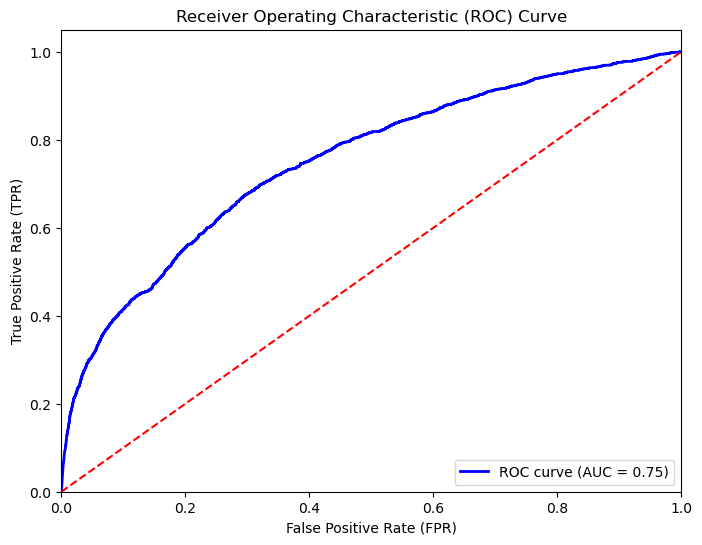

In [166]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Make predictions
y_pred_prob = model.predict(X_test)

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 3: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h1>  Oversampling the data </h1>

In [217]:
best_params ={'batch_size': 64, 'epochs': 2, 'layer1': 64, 'layer2': 32, 'activation': 'tanh'}

# training the model with oversampled data

In [223]:
model_res = Sequential()
model_res.add(Dense(best_params["layer1"], input_dim=X_res.shape[1], activation=best_params["activation"]))
model_res.add(Dense(best_params["layer2"], activation=best_params["activation"]))
model_res.add(Dense(1, activation='sigmoid'))
model_res.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#perform  early stop

model_res.fit(X_res, y_res, epochs=100, batch_size=best_params["batch_size"], verbose=1)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - accuracy: 0.8287 - loss: 0.3749
Epoch 2/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.9444 - loss: 0.1500
Epoch 3/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9700 - loss: 0.0844
Epoch 4/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.9785 - loss: 0.0582
Epoch 5/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.9834 - loss: 0.0460
Epoch 6/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9859 - loss: 0.0385
Epoch 7/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.9869 - loss: 0.0352
Epoch 8/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.9879 - loss: 0.0324
Epoch 9/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.9881 - loss: 0.0308
Epoch 10/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.9893 - loss: 0.0291
Epoch 11/100
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.9899 - loss: 0.02

In [229]:

predicted = model_res.predict(X_test) > 0.5

print(classification_report(predicted,y_test))


# not too much of difference between oversampled data and normal data

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
              precision    recall  f1-score   support

       False       0.94      0.92      0.93     21394
        True       0.29      0.36      0.32      1886

    accuracy                           0.88     23280
   macro avg       0.62      0.64      0.63     23280
weighted avg       0.89      0.88      0.88     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

<h1>  Using PCA </h1>

In [231]:
best_params

{'batch_size': 64,
 'epochs': 2,
 'layer1': 64,
 'layer2': 32,
 'activation': 'tanh'}

In [230]:

model_pca = Sequential()
model_pca.add(Dense(best_params['layer1'], input_dim=X_train_pca.shape[1], activation='tanh'))
model_pca.add(Dense(best_params['layer2'], activation='tanh'))
model_pca.add(Dense(1, activation='sigmoid'))
model_pca.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_pca.fit(X_train_pca, y_train, epochs=10, batch_size=best_params['batch_size'], verbose=1)

Epoch 1/10


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.8799 - loss: 0.2944
Epoch 2/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9480 - loss: 0.1781
Epoch 3/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9484 - loss: 0.1781
Epoch 4/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.9465 - loss: 0.1830
Epoch 5/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9475 - loss: 0.1801
Epoch 6/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9462 - loss: 0.1824
Epoch 7/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9474 - loss: 0.1811
Epoch 8/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9477 - loss: 0.1751
Epoch 9/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9490 - loss: 0.1754
Epoch 10/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9486 - loss: 0.1767


In [256]:
predicted = model.predict(X_test_pca) > 0.2
print(classification_report(predicted, y_test))

  1/728 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
              precision    recall  f1-score   support

       False       0.98      0.91      0.94     22425
        True       0.16      0.44      0.24       855

    accuracy                           0.90     23280
   macro avg       0.57      0.68      0.59     23280
weighted avg       0.95      0.90      0.92     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [174]:
y_train.value_counts()

target
0    49655
1     2905
Name: count, dtype: int64

<h1 style="red">  Conclusion  </h1>

<h6> 
-best model paramtetres are{'batch_size': 64, 'epochs': 2, 'layer1': 64, 'layer2': 32, 'activation': 'tanh'} <br>
choosing threshold :<br>
-to minimize False negatives, in this case missclassifying upcoming outbreaks as 0 is disasterous and is more
important than False positives, so the choose of threshold = 0.99999 is better<br>
-to maintain good tradeoff between precision and recall by maximzing f1_score (0.36) threshold=0.1 is better<br>

-oversampling data did no good<br>
-using Pca gave same results thus it would be preferrable it terms of cost.<br>

</h6>

<h1 style="color:green">  Decision Tree Classifier </h1>

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=46)

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'splitter': ['best', 'random']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_train, y_train)





/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=46),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [21]:
# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Using the best model to predict
best_model = grid_search.best_estimator_
test_predicted = best_model.predict(X_test)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
Best Accuracy: 0.9313356164383562


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [22]:
report = classification_report(test_predicted, y_test)
print(f"report=  {report}")

report=                precision    recall  f1-score   support

           0       1.00      0.90      0.95     23240
           1       0.00      0.12      0.00        40

    accuracy                           0.90     23280
   macro avg       0.50      0.51      0.48     23280
weighted avg       1.00      0.90      0.95     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [27]:
#test it on oversampled data
model = best_model.fit(X_res,y_res)
model.predict(X_test)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
print(classification_report(model.predict(X_test), y_test)) # priting classification report

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     20113
           1       0.23      0.16      0.19      3167

    accuracy                           0.81     23280
   macro avg       0.55      0.54      0.54     23280
weighted avg       0.79      0.81      0.80     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

<h1> 


K Nearest Neighbour




 </h1>

Oversamplin the data to reduce the umbalance

In [25]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_pca, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_oversampled))

Class distribution after oversampling: Counter({0: 49655, 1: 49655})


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

Performing grid search to determine the best parameters of the model

In [26]:

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}

# Set up the grid search
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict using the best KNN model
y_pred_knn = best_knn.predict(X_test_pca)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print(classification_report_knn)

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.2s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   1.0s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.3s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.3s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   1.3s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   1.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   1.1s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.3s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   1.1s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   1.1s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   1.2s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   1.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.3s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning

[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   1.1s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   1.4s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   1.3s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be remo

[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.2s
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time=   1.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.2s
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time=   1.3s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.8s
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time=   1.1s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   1.0s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   1.3s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   1.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.3s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time=   1.2s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   1.1s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   1.2s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   1.2s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time=   1.5s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   1.0s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   1.0s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.3s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.3s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   1.2s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.9s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.3s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   1.3s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.3s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning

[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   1.2s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   1.2s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   1.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   1.4s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   1.3s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.9s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   1.2s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.2s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   1.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   1.1s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.8s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   1.1s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   1.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   1.1s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   1.4s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.2s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   1.2s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   1.2s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   1.2s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   1.3s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   1.5s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.9s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.3s
[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   1.1s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   1.1s
[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   1.2s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.9s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   1.0s
[CV] END ...metric=minkowski, n_neighbors=9, weights=uniform; total time=   1.2s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=   0.2s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=   0.2s


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   0.8s
[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   0.9s
[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   0.8s
[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   1.0s
[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   1.0s
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.8460910652920962
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     20998
           1       0.17      0.14      0.15      2282

    accuracy                           0.85     23280
   macro avg       0.54      0.53      0.54     23280
weighted avg       0.84      0.85      0.84     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

fit the models with the best parameters found

In [27]:
knn_classifier_with_pca = KNeighborsClassifier(n_neighbors=3)  


In [28]:
# Train the Model
knn_classifier_with_pca.fit(X_train_pca, y_train)

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = knn_classifier_with_pca.predict(X_test_pca)


In [30]:
y_pred = np.array(y_pred)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
y_test

0        1
1        1
2        1
3        1
4        1
        ..
23275    0
23276    0
23277    0
23278    0
23279    0
Name: target, Length: 23280, dtype: int64

In [33]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_knn_with_pca = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report_knn_with_pca)

Accuracy: 0.8816580756013745
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     20998
           1       0.14      0.04      0.06      2282

    accuracy                           0.88     23280
   macro avg       0.52      0.51      0.50     23280
weighted avg       0.83      0.88      0.85     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

it is noticed that the 1 is not predicted well since the data is unbalanced

The KNN classifier applied for the non-reduced data (the original one)

In [34]:

# Train the Model
knn_classifier = KNeighborsClassifier(3)
knn_classifier.fit(X_train, y_train)

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: Future

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = knn_classifier.predict(X_test)

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("classification report:", report)

classification report:               precision    recall  f1-score   support

           0       0.90      0.97      0.94     20998
           1       0.16      0.05      0.07      2282

    accuracy                           0.88     23280
   macro avg       0.53      0.51      0.50     23280
weighted avg       0.83      0.88      0.85     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

There is no changes identified between the data with PCA and the original one

In [37]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

Trying oversampling the data to make a balance on it 

In [38]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_oversampled))

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

Class distribution after oversampling: Counter({0: 49655, 1: 49655})


In [39]:
# Train the Model
knn_classifier.fit(X_train_oversampled, y_train_oversampled)

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: Future

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred = knn_classifier.predict(X_test)
y_pred 

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 0, 0, ..., 0, 0, 0])

In [41]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     20998
           1       0.20      0.26      0.22      2282

    accuracy                           0.82     23280
   macro avg       0.56      0.57      0.56     23280
weighted avg       0.85      0.82      0.83     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

There is a remarkable inmprovement in the measearse when trying the oversamling

Conclusion:

The KNN classifier, while accurate, initially fails to achieve satisfactory precision and recall due to the severe class imbalance in the dataset. It efficiently predicts the majority class (1s) but is inadequate in identifying the minority class (0s). This imbalance renders the classifier less effective for applications where the detection of the minority class is critical. Applying PCA does not improve the model's performance, indicating that the primary issue lies with the dataset's imbalance rather than its dimensionality. However, implementing oversampling on the training data significantly enhances the model's precision and recall, demonstrating that balancing the class distribution is essential for improving the classifier's overall performance.

<h1 style="color:green"> 



Support Vector Machines 




</h1>

## Fitting SVM on PCA-Reduced Data

When working with high-dimensional datasets, training a Support Vector Machine (SVM) can be computationally intensive and time-consuming. To address this issue, we use the recuded data with the Principal Component Analysis (PCA).

In [36]:
# Instantiate the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_pca, y_train)

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC()

In [37]:
# Make Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)
#y_pred_svm = y_pred_svm[: ,1]
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
y_test_target = y_test
y_test_target

0        1
1        1
2        1
3        1
4        1
        ..
23275    0
23276    0
23277    0
23278    0
23279    0
Name: target, Length: 23280, dtype: int64

In [39]:
y_test_array = np.array(y_test_target)
y_test_array

array([1, 1, 1, ..., 0, 0, 0])

In [43]:
from sklearn.metrics import classification_report
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report_svm)

SVM Accuracy: 0.9019759450171821
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20998
           1       0.00      0.00      0.00      2282

    accuracy                           0.90     23280
   macro avg       0.45      0.50      0.47     23280
weighted avg       0.81      0.90      0.86     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

The SVM classifier achieved an overall accuracy of 90.20%, performing well on the majority class (0) but failing to identify the minority class (1). The precision, recall, and F1-score for class 1 are all 0.00, indicating poor detection of this class due to severe class imbalance. To improve performance on the minority class, techniques like oversampling, undersampling, or different algorithms should be considered.








the svm accuracy for the train


In [44]:
# Make Predictions
y_pred_svm_train = svm_classifier.predict(X_train_pca)
y_pred_svm_train

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
y_train_target = y_train
y_train_target = np.array(y_train_target)
y_train_target

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Calculate accuracy
accuracy_svm_train = accuracy_score(y_train_target, y_pred_svm_train) 
print("SVM Accuracy:", accuracy_svm_train)

SVM Accuracy: 0.9453576864535769


In [47]:
# Calculate accuracy
from sklearn.metrics import classification_report
classification_report_svm_train = classification_report(y_train_target, y_pred_svm_train) 
print(classification_report_svm_train)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     49655
           1       0.68      0.02      0.04      2905

    accuracy                           0.95     52560
   macro avg       0.81      0.51      0.51     52560
weighted avg       0.93      0.95      0.92     52560



In [32]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_pca, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_oversampled))

Class distribution after oversampling: Counter({0: 49655, 1: 49655})


/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

In [33]:
# Instantiate the SVM classifier
svm_classifier = SVC()
# Train the SVM classifier on the training data
svm_classifier.fit(X_train_oversampled, y_train_oversampled)

/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC()

In [34]:
# Make Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)
#y_pred_svm = y_pred_svm[: ,1]
y_pred_svm

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
# Calculate accuracy
classification_report_svm_oversampled = classification_report(y_test, y_pred_svm) 
print(classification_report_svm_oversampled)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     20998
           1       0.13      0.20      0.16      2282

    accuracy                           0.79     23280
   macro avg       0.52      0.53      0.52     23280
weighted avg       0.83      0.79      0.81     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

After applying oversampling to balance the classes, the SVM classifier's performance improved for the minority class (1). The precision for class 1 increased to 0.13, recall to 0.20, and F1-score to 0.16, indicating better detection of this class. For the majority class (0), precision is 0.91, recall is 0.85, and F1-score is 0.88. The overall accuracy decreased to 78%, reflecting a trade-off for better minority class detection. The macro average precision, recall, and F1-score are now 0.52, 0.53, and 0.52, respectively, and the weighted average metrics are 0.83, 0.78, and 0.81. While the classifier still favors the majority class, oversampling has improved its ability to identify minority class instances.






